In [9]:
import pandas as pd
df=pd.read_csv('main_data.csv')

In [10]:
df

,drug_row,drug_col,cell_line_name,ic50_row,ic50_col,synergy_loewe,drug_row_clinical_phase,drug_col_clinical_phase,MW_x,LogP_x,MolFinger_x,NumHDonors_x,NumHAcceptors_x,MW_y,LogP_y,MolFinger_y,NumHDonors_y,NumHAcceptors_y,similarity
0,2,1,0,0.500000,0.003405,-0.000388,0,4,780.949,2.21810,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,6.0,14.0,719.924,2.58350,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,4.0,8.0,0.270
1,0,1,0,20.000000,0.003405,-0.000327,3,4,505.699,6.37898,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.0,5.0,719.924,2.58350,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,4.0,8.0,0.272
2,1,1,0,50.000000,0.003405,-0.000314,0,4,879.405,17.42510,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.0,6.0,719.924,2.58350,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,4.0,8.0,0.133
3,3,1,0,20.000000,0.003405,-0.000327,2,4,974.634,8.83320,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.0,11.0,719.924,2.58350,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,4.0,8.0,0.383
4,0,3,0,20.000000,0.003405,-0.000327,3,0,505.699,6.37898,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.0,5.0,780.949,2.21810,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,6.0,14.0,0.374
5,1,3,0,50.000000,0.003405,-0.000314,0,0,879.405,17.42510,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.0,6.0,780.949,2.21810,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,6.0,14.0,0.222
6,3,3,0,20.000000,0.003405,-0.000327,2,0,974.634,8.83320,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.0,11.0,780.949,2.21810,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,6.0,14.0,0.317
7,1,0,0,50.000000,0.136210,-0.000370,0,3,879.405,17.42510,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.0,6.0,505.699,6.37898,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.0,5.0,0.207
8,3,0,0,20.000000,0.136210,-0.000388,2,3,974.634,8.83320,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.0,11.0,505.699,6.37898,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.0,5.0,0.291
9,3,2,0,20.000000,0.340523,-0.000404,2,0,974.634,8.83320,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.0,11.0,879.405,17.42510,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.0,6.0,0.108


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot

import numpy as np
from numpy import nan
from numpy import mean
from numpy import std
from sklearn import tree
import xgboost as xgb
# importing models
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split # Import train_test_split function

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import seaborn as sns
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)



In [12]:
df.loc[df['similarity']<0.270,'synergistic'] = 0 #antagonistic
df.loc[df['similarity']>=0.270,'synergistic'] = 1 #synergistic

In [13]:
df

,drug_row,drug_col,cell_line_name,ic50_row,ic50_col,synergy_loewe,drug_row_clinical_phase,drug_col_clinical_phase,MW_x,LogP_x,MolFinger_x,NumHDonors_x,NumHAcceptors_x,MW_y,LogP_y,MolFinger_y,NumHDonors_y,NumHAcceptors_y,similarity,synergistic
0,2,1,0,0.500000,0.003405,-0.000388,0,4,780.949,2.21810,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,6.0,14.0,719.924,2.58350,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,4.0,8.0,0.270,1.0
1,0,1,0,20.000000,0.003405,-0.000327,3,4,505.699,6.37898,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.0,5.0,719.924,2.58350,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,4.0,8.0,0.272,1.0
2,1,1,0,50.000000,0.003405,-0.000314,0,4,879.405,17.42510,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.0,6.0,719.924,2.58350,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,4.0,8.0,0.133,0.0
3,3,1,0,20.000000,0.003405,-0.000327,2,4,974.634,8.83320,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.0,11.0,719.924,2.58350,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,4.0,8.0,0.383,1.0
4,0,3,0,20.000000,0.003405,-0.000327,3,0,505.699,6.37898,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.0,5.0,780.949,2.21810,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,6.0,14.0,0.374,1.0
5,1,3,0,50.000000,0.003405,-0.000314,0,0,879.405,17.42510,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.0,6.0,780.949,2.21810,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,6.0,14.0,0.222,0.0
6,3,3,0,20.000000,0.003405,-0.000327,2,0,974.634,8.83320,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.0,11.0,780.949,2.21810,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,6.0,14.0,0.317,1.0
7,1,0,0,50.000000,0.136210,-0.000370,0,3,879.405,17.42510,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.0,6.0,505.699,6.37898,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.0,5.0,0.207,0.0
8,3,0,0,20.000000,0.136210,-0.000388,2,3,974.634,8.83320,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.0,11.0,505.699,6.37898,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.0,5.0,0.291,1.0
9,3,2,0,20.000000,0.340523,-0.000404,2,0,974.634,8.83320,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.0,11.0,879.405,17.42510,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.0,6.0,0.108,0.0


Text(0, 0.5, 'Count(100)')

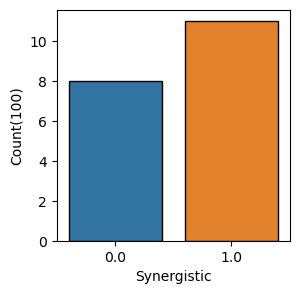

In [14]:
plt.figure(figsize=(3, 3))

sns.countplot(x='synergistic', data=df, edgecolor='black')

plt.xlabel('Synergistic')
plt.ylabel('Count(100)')

# plt.savefig('synergistic counts.png')

In [15]:
#Declaration of features and splitting the data into train and test
features = ['drug_row','drug_col','cell_line_name','ic50_row','ic50_col','MW_x', 'LogP_x', 'NumHDonors_x','NumHAcceptors_x', 'MW_y', 'LogP_y','NumHDonors_y', 'NumHAcceptors_y']
target = ['synergistic']
#print(len(features))
x = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)
X_train

,drug_row,drug_col,cell_line_name,ic50_row,ic50_col,MW_x,LogP_x,NumHDonors_x,NumHAcceptors_x,MW_y,LogP_y,NumHDonors_y,NumHAcceptors_y
13,0,3,0,0.657029,0.500000,505.699,6.37898,0.0,5.0,780.949,2.21810,6.0,14.0
8,3,0,0,20.000000,0.136210,974.634,8.83320,2.0,11.0,505.699,6.37898,0.0,5.0
14,1,3,0,3.568478,0.411574,879.405,17.42510,0.0,6.0,780.949,2.21810,6.0,14.0
16,1,0,0,4.217909,1.361728,879.405,17.42510,0.0,6.0,505.699,6.37898,0.0,5.0
18,3,2,0,20.000000,4.786330,974.634,8.83320,2.0,11.0,879.405,17.42510,0.0,6.0
12,1,1,0,4.195783,0.036448,879.405,17.42510,0.0,6.0,719.924,2.58350,4.0,8.0
11,0,1,0,0.576030,0.013908,505.699,6.37898,0.0,5.0,719.924,2.58350,4.0,8.0
1,0,1,0,20.000000,0.003405,505.699,6.37898,0.0,5.0,719.924,2.58350,4.0,8.0
0,2,1,0,0.500000,0.003405,780.949,2.21810,6.0,14.0,719.924,2.58350,4.0,8.0
15,3,3,0,20.000000,0.003752,974.634,8.83320,2.0,11.0,780.949,2.21810,6.0,14.0


Accuracy: 0.5714285714285714
F1 Score: 0.4
Cross val Accuracy: 0.563 (0.274)


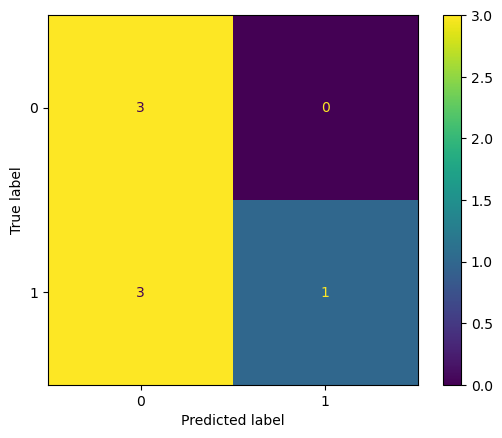

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(X_train,y_train.values.ravel())

y_pred=knn.predict(X_test)

acc= metrics.accuracy_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)

print("Accuracy:",acc)
print("F1 Score:",f1)
      
# Cross validation
scores_kn = cross_val_score(knn, x, y.values.ravel(), scoring='f1_macro')
scores_kn

print('Cross val Accuracy: %.3f (%.3f)' % (mean(scores_kn), std(scores_kn)))

# Visual representation

cm_kn = confusion_matrix(y_test, y_pred)

cm_kn_display = ConfusionMatrixDisplay(cm_kn).plot()

Accuracy: 0.5714285714285714
F1 Score: 0.7272727272727273
Cross val Accuracy: 0.366 (0.041)


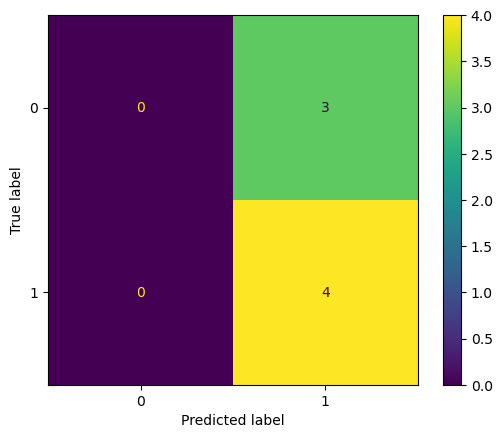

In [17]:
clf = XGBClassifier(max_depth= 15, min_child_weight= 3, scale_pos_weight= 6, use_label_encoder=None,eval_metric = 'error')


clf.fit(X_train, y_train.values.ravel())

y_pred = clf.predict(X_test)
# Calculating Accuracy and f1 score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
# Cross validation
scores = cross_val_score(clf, x, y.values.ravel(), scoring='f1_macro')
print('Cross val Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
# Defining the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
# Visual representation
cm_xgb = confusion_matrix(y_test, y_pred)
fig = ConfusionMatrixDisplay(cm_xgb).plot()


Accuracy: 0.8571428571428571
F1 Score: 0.8571428571428571
Cross val Accuracy: 0.947 (0.107)


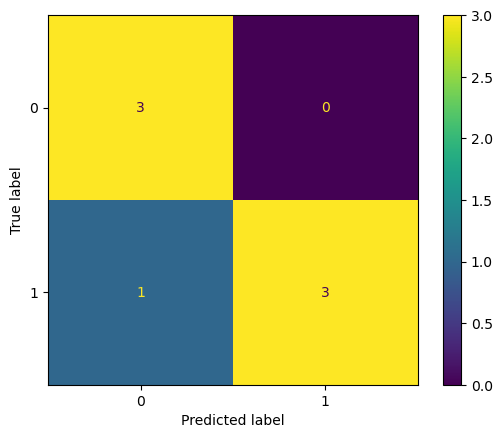

In [18]:
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.45, random_state=9)
rf = RandomForestClassifier(n_estimators=100,random_state=7)

rf.fit(X_train, y_train.values.ravel())

y_pred_rf = rf.predict(X_test)


y_pred_rf

# Calculating Accuracy and f1 score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("F1 Score:",f1_score(y_test, y_pred_rf))

# Cross validation
scores_rf = cross_val_score(rf, x, y.values.ravel(), scoring='f1_macro')
scores_rf

print('Cross val Accuracy: %.3f (%.3f)' % (mean(scores_rf), std(scores_rf)))

# Visual representation

cm_rf = confusion_matrix(y_test, y_pred_rf)

cm_rf_display = ConfusionMatrixDisplay(cm_rf).plot()


Accuracy: 0.8571428571428571
F1 Score: 0.8571428571428571
Cross val Accuracy: 0.947 (0.107)


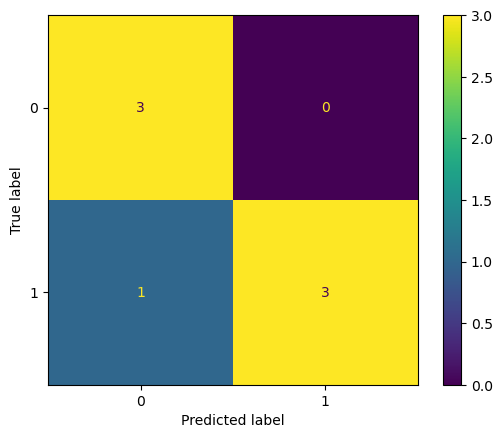

In [19]:
clf_dt = DecisionTreeClassifier(random_state=7)
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)
clf_dt.fit(X_train, y_train.values.ravel())

y_pred_dt = clf_dt.predict(X_test)

y_pred_dt

# Calculating Accuracy and f1 score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("F1 Score:",f1_score(y_test, y_pred_dt))

# Cross validation
scores_dt = cross_val_score(clf_dt, x, y.values.ravel(), scoring='f1_macro')
scores_dt

print('Cross val Accuracy: %.3f (%.3f)' % (mean(scores_dt), std(scores_dt)))

# Visual representation

cm_dt = confusion_matrix(y_test, y_pred_dt)

cm_dt_display = ConfusionMatrixDisplay(cm_dt).plot()